# Notebook 2 - Polinômio de Taylor e Método da Bisseção

Gabrielly de Andrade da Silva - 116149740

## 1. Polinômio de Taylor

O polinômio de Taylor (Pn) descreve um polinômio em torno de um determinado ponto. Vamos denotar o grau como **n**, a função **f** e o ponto **a**

$$
    Pn(x) = f(a) + f'(a)(x-a) + \frac{f''(a)(x-a)^2}{2} + \frac{f'''(a)(x-a)^3}{3!} + ... + \frac{f'''(a)(x-a)^n}{n!} 
$$

**Exemplo:**

Considere $fn(x) = e^x$

Sabemos que todas as suas derivadas valem o próprio $e^x$

Com isso temos o seguinte polinômio de Taylor:

$$
    Pn(x) = e^x + e^xx + \frac{e^xx^2}{2} + ... + \frac{e^xx^n}{n!}
$$

Considerando o ponto a=0 e n=3, o valor da função f(a) no ponto vale $e^a = e^0 = 1$, com isso temos que:

$$
    Pn(x) = 1 + x + \frac{x^2}{2} + \frac{x^3}{3!}
$$

Considerando o valor de $x=1$, temos que o valor da função deve valer $f(1)=e$, com isso o polinômio também deve aproximar desse valor $Pn(1)=e$.

Sendo assim, o valor da função $e^x$ também é descrita como um somatório dos termos

$$
    1 + x + \frac{x^2}{2} + ... + \frac{x^n}{n!}
$$

sendo n o valor do grau do polinômio.

Vamos realizar alguns testes com o Julia

In [1]:
MathConstants.e

ℯ = 2.7182818284590...

In [2]:
exp(1)

2.718281828459045

In [3]:
function exp_por_taylor(x, n)
    # Calcula a exponencial de e^x com n termos pelo polinômio de Taylor
    
    soma = 1.0
    for i = 1:n
        soma += x^i / factorial(i) # Poderia ser factorial(BigInt(i)) mas não tem necessidade pois os termos tentes a zero
    end
    return soma
end

exp_por_taylor (generic function with 1 method)

In [4]:
exp_por_taylor(1.0, 1)

2.0

In [5]:
# Função genérica que calcula a quantidade de termos necessárias
n = 0
somatorio = exp_por_taylor(1, n)
while somatorio <= exp(1)
    n += 1
    somatorio = exp_por_taylor(1, n)
end

println("Somatório: ", somatorio)
println("Quantidade de termos (grau do polinômio): ", n)



Somatório: 2.7182818284590455
Quantidade de termos (grau do polinômio): 17


In [6]:
# Calculando a diferença do erro absoluta

exp_por_taylor(1.0, 17) - exp(1.0)

4.440892098500626e-16

In [7]:
# Caso que da overflow por conta do 21!
exp_por_taylor(5.0, 30) - exp(5.0)

LoadError: OverflowError: 21 is too large to look up in the table; consider using `factorial(big(21))` instead

In [8]:
function exp_por_taylor_2(x, n)
    # Calcula a exponencial de e^x com n termos pelo polinômio de Taylor
    
    soma = 1.0
    termo_anterior = 1.0
    for i = 1:n
        termo_anterior *= x / i
        soma += termo_anterior
    end
    return soma
end

exp_por_taylor_2 (generic function with 1 method)

Com essa nova função não temos Overflow pois estamos calculando o próximo termo a partir do resultado do termo anterior

$$
    a_{n} = \frac{x^n}{n!} = \frac{x}{n} * \frac{x^{n-1}}{(n-1)!}
$$

In [9]:
exp_por_taylor_2(5.0, 32)

148.4131591025766

In [10]:
exp(5.0)

148.4131591025766

Nota: diferentemente do que foi visto no [vídeo](https://www.youtube.com/watch?v=220qYWumBHI&feature=youtu.be&list=PLOOY0eChA1uyO7qjoupZ3979741csLLTE&t=4024), tanto o exponencial do Julia quanto da função calculada chegaram a um mesmo valor

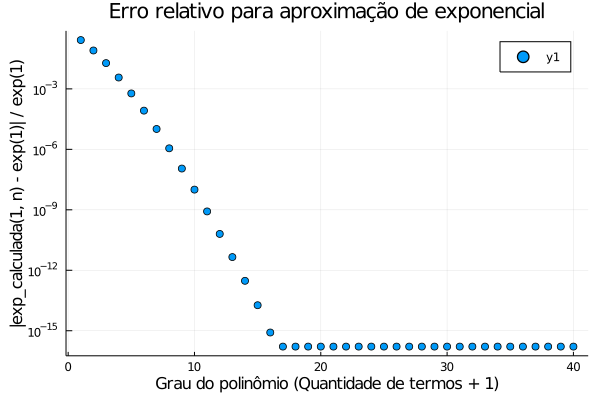

In [11]:
using Plots
N = collect(1:40)
x = 1
Erro = [abs(exp_por_taylor_2(x, n) - exp(x)) / exp(x) for n in N]

scatter(N, Erro, yaxis=:log)
xlabel!("Grau do polinômio (Quantidade de termos + 1)")
ylabel!("|exp_calculada($x, n) - exp($x)| / exp($x)")
title!("Erro relativo para aproximação de exponencial")

In [12]:
# Outra abordagem que simula o exp(x) do Julia

function exp_por_taylor_3(x)
    # Calcula a exponencial de e^x com n termos pelo polinômio de Taylor
    
    soma = 1.0
    termo_anterior = 1.0
    i = 1
    while soma + termo_anterior != soma
        termo_anterior *= x / i
        soma += termo_anterior
        i +=1
    end
    return soma
end

exp_por_taylor_3 (generic function with 1 method)

In [13]:
exp_por_taylor_3(1)

2.7182818284590455

In [14]:
exp(1)

2.718281828459045

In [15]:
exp_por_taylor_3(1) - exp(1)

4.440892098500626e-16

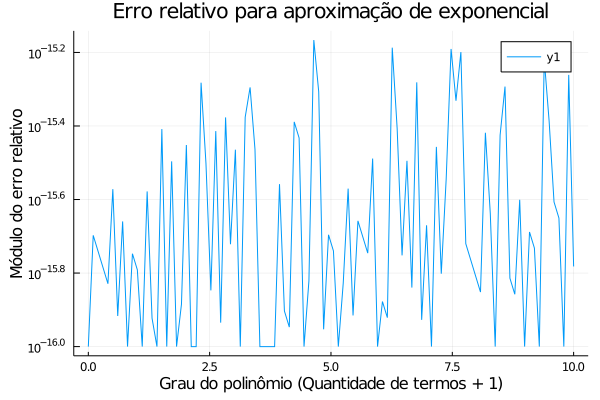

In [16]:
using Plots
X = range(0.0, 10.0, length=100)
Erro = [max(abs(exp_por_taylor_3(x) - exp(x)) / exp(x), 1e-16) for x in X]

plot(X, Erro, yaxis=:log)
xlabel!("Grau do polinômio (Quantidade de termos + 1)")
ylabel!("Módulo do erro relativo")
title!("Erro relativo para aproximação de exponencial")
# Erro precisa estar próximo da precisão da máquina, 10^-16

### Aproximando com séries alternadas

Séries alternadas são difíceis de manter, veja o erro na plotagem abaixo


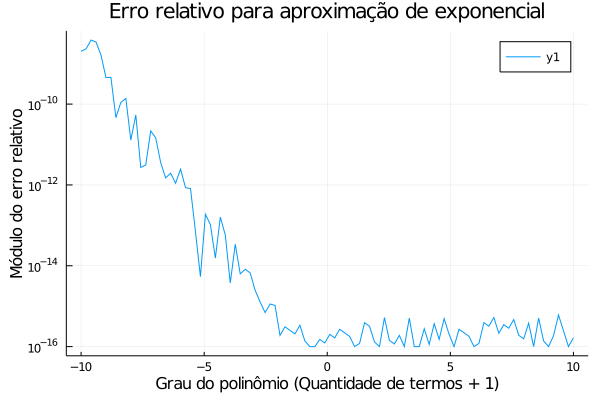

In [17]:

using Plots
X = range(-10.0, 10.0, length=100)
Erro = [max(abs(exp_por_taylor_3(x) - exp(x)) / exp(x), 1e-16) for x in X]

plot(X, Erro, yaxis=:log)
xlabel!("Grau do polinômio (Quantidade de termos + 1)")
ylabel!("Módulo do erro relativo")
title!("Erro relativo para aproximação de exponencial")

In [18]:
# Outra abordagem que simula o exp(x) do Julia, mas agora olhando para cálculos negativos

function exp_por_taylor_4(x)
    # Calcula a exponencial de e^x com n termos pelo polinômio de Taylor
    
    if  x>= 0
        return exp_por_taylor_3(x)
    else
        return 1.0 / exp_por_taylor_3(-x)

    end
end

exp_por_taylor_4 (generic function with 1 method)

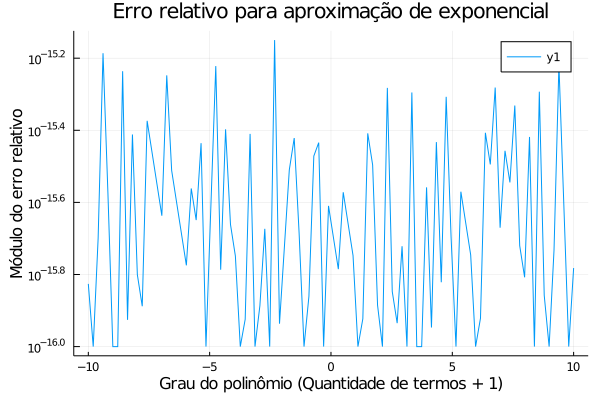

In [19]:
using Plots
X = range(-10.0, 10.0, length=100)
Erro = [max(abs(exp_por_taylor_4(x) - exp(x)) / exp(x), 1e-16) for x in X]

plot(X, Erro, yaxis=:log)
xlabel!("Grau do polinômio (Quantidade de termos + 1)")
ylabel!("Módulo do erro relativo")
title!("Erro relativo para aproximação de exponencial")


## Calculando aproximação de pi

Aproximação do valor de pi

Seja a função $f(x)$ definida por $arctg(x)$, vamos calular uma aproximação usando o polinômio de Taylor. 
Sabemos que $f'(x) = \frac{1}{1+x^2}$ e esse resultado também pode ser definido como a seguinte progressão geométrica (PG)

$$
    \frac{1}{1+x^2} = 1 - x^2 + x^4 - x^6 + x^8 ...
$$

Integrando o resultado temos que:

$$
    x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} + ...
$$

Nota: Um fato curioso foi descobrir que poderíamos simplificar com uma série ao invés de fazer todos os cálculos de derivada na mão

In [20]:
function pi_atan(n)
    # pi ~= 4 * (1 - 1/3 + 1/5 - 1/7 + 1/9 para n termos)
    # n   =      1    2     3     4     5
    
    sinal = 1.0
    soma = 0.0
    denominador = 1
    
    for i=1:n
        soma += sinal * 1/denominador
        sinal *= -1
        denominador += 2
    end
    
    return 4 * soma
end

pi_atan (generic function with 1 method)

In [21]:
pi_atan(3)

3.466666666666667

In [22]:
4 * (1.0 - 1.0/3.0 + 1.0/5.0)

3.466666666666667

In [23]:
@assert pi_atan(3) ≈ 4 * (1.0 - 1.0/3.0 + 1.0/5.0)

In [24]:
# Função genérica que calcula a soma de pi para n termos
n = 10
for i=1:n
    println("Termos: ", i)
    println("Somatório: ", pi_atan(i))
    println("")
end

# Nota: com poucos termos isso não é satisfatório, os valores oscilam e não convergem para uma maior precisão em número de casas

Termos: 1
Somatório: 4.0

Termos: 2
Somatório: 2.666666666666667

Termos: 3
Somatório: 3.466666666666667

Termos: 4
Somatório: 2.8952380952380956

Termos: 5
Somatório: 3.3396825396825403

Termos: 6
Somatório: 2.9760461760461765

Termos: 7
Somatório: 3.2837384837384844

Termos: 8
Somatório: 3.017071817071818

Termos: 9
Somatório: 3.2523659347188767

Termos: 10
Somatório: 3.0418396189294032



In [25]:
pi_atan(10000)

3.1414926535900345

In [26]:
pi

π = 3.1415926535897...

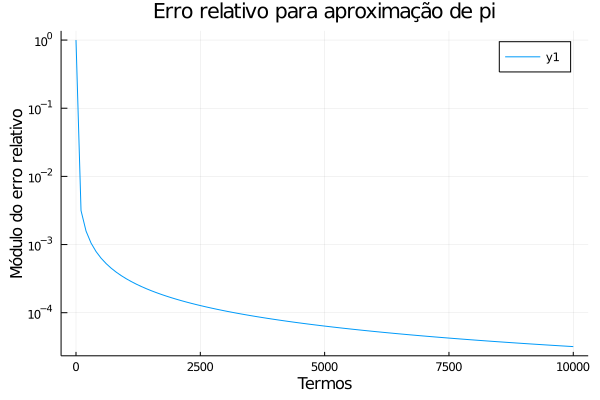

In [27]:
using Plots
X = range(0, 10000, length=100)
Erro = [max(abs(pi_atan(x) - pi) / pi, 1e-16) for x in X]

plot(X, Erro, yaxis=:log)
xlabel!("Termos")
ylabel!("Módulo do erro relativo")
title!("Erro relativo para aproximação de pi")


**Nota:** Aqui temos um fato curioso, comparando com o exponencial anterior para termos um erro relativo baixo precisamos de muitos termos 

## 2. Zeros de função

Nesse problema queremos calcular uma função que em um intervalo o seu valor seja zero $f(x) = 0$.

Um caso comum: $xe^x = 1$

In [28]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

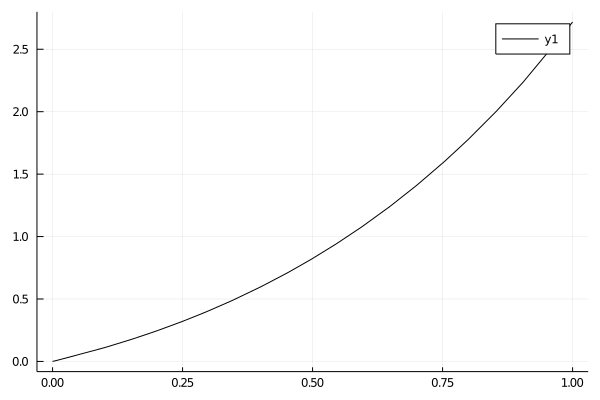

In [29]:
f(x) = exp(x) * x
plot(f, 0, 1, c=:black)

**Teorema do valor intermediário**: https://pt.khanacademy.org/math/ap-calculus-ab/ab-limits-new/ab-1-16/a/intermediate-value-theorem-review

### Método da bissecção

Método para identificar o zero da função a partir de múltiplos métodos de divisão (cortes) na função

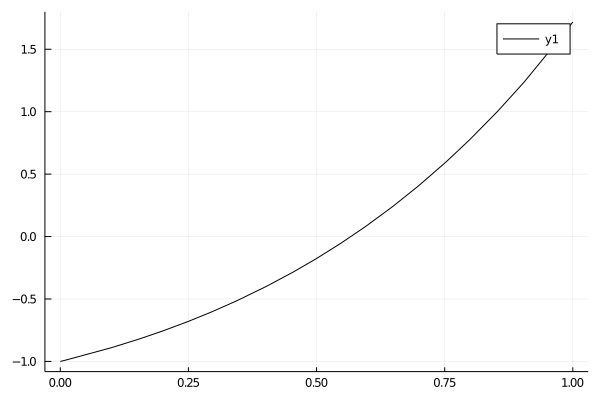

In [30]:
f(x) = exp(x) * x - 1
plot(f, 0, 1, c=:black)

Ao sair dos extremos de entre 0 e ~2.7, vemos que o zero se encontre mais ou menos na metade.

Tendo dois pontos A e B, considerando que A < 0 e B > 0, com certeza em algum lugar nesse intervalo a minha função passa por zero considerando que ela é contínua (ideia do teorema do valor intermediário)

### Teorema

Se f é contúnua em $[a, b]$ e $f(a)$ e $f(b)$ tem sinais opostos, então $a_k, b_k, x_k -> x'$, onde $x'$ é zero de  $f$

### Método da bissecção

- Dado $[a,b]$ com $f(a)*f(b) < 0$
- Escolho c pertencente a $(a,b), (c = \frac{a+b}{2})$
- Se $f(c)=0$, Fim
- Senão $f(a)*f(c) < 0$ ou $f(c)*f(b) < 0$, logo escolho o intervalo correspondente e repito

In [31]:
f(x) = x * exp(x) - 1
a, b = 0.0, 1.0

(0.0, 1.0)

In [32]:
# Passo 1: sinais opostos

@assert f(a)*f(b) < 0 # Validado

In [33]:
# Passo 2: Validar extremos

x = (a + b) / 2
if f(a) * f(x) < 0
    b = x
else
    a = x
end
x, f(x)

(0.5, -0.1756393646499359)

### Critérios de parada de função

Por conta do limite da máquina e pensando que o algoritmo precisa executar em um tempo finito, precisamos pensar em uma condição de parada.
Diferentemente de um método, a diferença é sutil uma vez que um método poderá convergir para o infinito, já no algoritmo não.

Para pensar na condição de parada, vamos pensar sobre o erro absoluto e o erro relativo

#### Erro absoluto

$$
    | x - x'|
$$

#### Erro relativo

$$
    \frac{| x - x'|}{|x|}
$$

Podemos escolher uma tolerância, escolhida pelo usuário, como critério de parada. 
Podemos definir o quanto de erro o usuário estará disposto a aceitar

$|f(x) < E|$ onde E (epsilon) é a tolerância 

$$
    |f(x)| < E_A + E_R * |f(x_0)|
$$

- $E_A$ => tolerância absoluta 
- $E_R$ => tolerância relativa

**Nota:** O erro relativo nos ajuda a entender a ordem de grandeza do número que estamos trabalhando. 
Ex.: `R$ 1` perto de `R$ 1.000.000` é pouco, mas comparando com `R$ 2` é o dobro.

**Nota 2:** Quando estamos trabalhando com funções bem comportadas e que possui uma estimativa boa do seu valor real, às vezes poderá ser usado somente a tolerância absoluta

Considerando o esboço do algoritmo feito anteriormente e as tolerâncias apresentadas, podemos declarar como critério de parada do algoritmo sempre que estivermos muito próximo da tolerância, seja ela absoluta ou relativa. Logo, quando o intervalo estiver pequeno não precisaremos mais considerar realizar novamente o método pois o resultado esperado já estará sendo atendido.

**Situações que podem demorar:**
- muitas iterações sem convergir para um valor
- número de avaliações de f grande, cada método que calcula $f(x)$
- tempo (o método é caro)

In [34]:
# Implementação considerando que a função é contínua e situações que podem demorar

function bisseccao(f, a, b; tol_absoluta = 1e-8, tol_relativa = 1e-8, tempo_maximo = 10.0, iteracao_maxima = 1000)
    fa = f(a)
    fb = f(b)
    tolerancia = tol_absoluta + tol_relativa * max(abs(fa), abs(fb))
    tolerancia_ab = tol_absoluta + tol_relativa * abs(b-a)
    
    if abs(fa) <= tolerancia
        return a, fa, :sucesso
    elseif abs(fb) <= tolerancia
        return b, fb, :sucesso
    elseif fa * fb >= 0
        return a, fa, :falha_sinais_devem_ser_opostos
    end
    
    x = (a + b) / 2
    
    
    fx = f(x)
    iteracao = 0
    t0 = time()
    variacao_tempo = time() - t0
    
    resolvido = (abs(fx) <= tolerancia || abs(b-a) <= tolerancia_ab)
    iteracoes_demais = (iteracao >= iteracao_maxima || variacao_tempo >= tempo_maximo)
    
    while !(resolvido || iteracoes_demais)
        
        if fa * fx < 0
            b = x
            fb = fx
        else
            a = x
            fa = fx
        end
        
        x = (a + b) / 2
        fx = f(x)
        
        
        iteracao += 1
        variacao_tempo = time() - t0
        resolvido = (abs(fx) <= tolerancia || abs(b-a) <= tolerancia_ab)
        iteracoes_demais = (iteracao >= iteracao_maxima || variacao_tempo >= tempo_maximo)
    end
    
    status = :desconhecido
    if resolvido
        status = :sucesso
    elseif iteracoes_demais
        if iteracao >= iteracao_maxima
            status = :maximo_de_iteracao_alcancada
        else
            status = :ttempo_maximo_alcancado
        end
    end
    
    return x, fx, status, iteracao
    
    
end

bisseccao (generic function with 1 method)

In [35]:
f(x) = x * exp(x) - 1
a, b = 0.0, 1.0

bisseccao(f, a, b)

(0.5671432912349701, 2.2801733834398874e-9, :sucesso, 24)

In [36]:
f(x) = (x * exp(x) - 1) * 1e8
a, b = 0.0, 1.0

bisseccao(f, a, b)

(0.5671432912349701, 0.22801733834398874, :sucesso, 24)

In [37]:
y = 0.5671432912349701
y * exp(y) - 1

2.2801733834398874e-9

### Calculando $sqrt(2)$

Precisamos pegar um número x tal que ele elevado ao quadrado seja muito próximo de 2, com x > 0

In [38]:
g(x) = x^2 - 2
a, b = 1.2, 2.0

bisseccao(g, a, b)

(1.4142135620117187, -1.0221268276211504e-9, :sucesso, 18)

In [39]:
# Fazendo a mesma aproximação, porém com 100 cadas decimais
g(x) = x^2 - 2
a, b = 1.2, 2.0

bisseccao(g, a, b, tol_absoluta=1e-100, tol_relativa=0.0)

(1.414213562373095, -4.440892098500626e-16, :maximo_de_iteracao_alcancada, 1000)

In [40]:
# Fazendo a mesma aproximação, porém com 100 cadas decimais e com uma nova precisão de números do tipo Big float

setprecision(512)

g(x) = x^2 - 2
a, b = big"1.2", big"2.0"

bisseccao(g, a, b, tol_absoluta=1e-100, tol_relativa=0.0)

(1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157275224589033635641962621240954008626304864805448024223524, 4.87395809626608531048102650422829851412955978736681978558687283612949181546781751012687967355491097530752246626140826494943161665621523046074891682187686832e-101, :sucesso, 329)

In [41]:
sqrt(big"2")

1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157273501384623091229702492483605585073721264412149709993586

In [42]:
# Exemplo com sqrt(3)

h(x) = x^2 - 3
a, b = 1.5, 2.0

bisseccao(h, a, b, tol_absoluta=1e-100, tol_relativa=0.0)

(1.7320508075688772, -4.440892098500626e-16, :maximo_de_iteracao_alcancada, 1000)

In [43]:
sqrt(3)

1.7320508075688772

### Exemplo com valor de parcelas (tabela price)

https://mundoeducacao.uol.com.br/matematica/tabela-price.htm

In [44]:
qtd_parcelas = 48
valor = 40_000
parcela = 900
function equacao_price(i) 
    if i == 0
        return parcela - valor / qtd_parcelas
    else
        return parcela - valor * (1 + i)^qtd_parcelas * i / ((1 + i)^qtd_parcelas - 1)
    end
end
bisseccao(equacao_price, 0.0, 1.0)

(0.003185957670211792, -0.00010629466919453989, :sucesso, 24)

In [45]:
equacao_price(0)

66.66666666666663

### Considerações finais sobre o tópico 2

O método é eficaz, mas com os testes vimos que às vezes é necessário muitas interações para ter uma precisão boa. Com isso, temos muitos passos para realizar o problema tornando o mesmo lento. Ele possui uma convergência linear, ou seja, a cada interação diminuimos pela metade o erro.

## 3. Lista de Exercícios - Polinômio de Taylor

$$
    Pn(x) = f(a) + f'(a)(x-a) + \frac{f''(a)(x-a)^2}{2} + \frac{f'''(a)(x-a)^3}{3!} + ... + \frac{f'''(a)(x-a)^n}{n!} 
$$

### 2. Seja f : [−a, a] → R a função definida por $f(x) = e^x$

#### (a) Calcule o polinômio de Taylor $P_2(x)$ de ordem dois de f(x) na origem.


Como todas as derivadas de $e^x$ é ele próprio e a função estar centrada na origem significa $a = 0$, temos que

**Polinômio:**


$$
    Pn(x) = e^a + e^ax + \frac{e^ax^2}{2} + ... + \frac{e^ax^n}{n!}
$$
**Polinômio com a=0 e 2 termos:**

Como $e^a = e^0 = 1$,

$$
    P_2(x) = 1 + x + \frac{x^2}{2}
$$



#### (b) Qual o maior valor de a para o qual podemos usar $P_2(x)$ para aproximar f(x) com erro inferior a 0.005 em todo o intervalo [−a, a]?

In [46]:
function ex3_taylor_exp(x)
    soma = 1.0
    termo_anterior = 1.0
    i = 1
    
    while soma + termo_anterior != soma
        termo_anterior *= x / i
        soma += termo_anterior
        i +=1
    end
    return soma
end

ex3_taylor_exp (generic function with 1 method)

In [47]:
a = 0
tolerancia = 0.005
erro_absoluto = abs(ex3_taylor_exp(a) - exp(a))

while erro_absoluto < tolerancia
    a += 1
    erro_absoluto = abs(ex3_taylor_exp(a) - exp(a))
end

println(a)

31


In [48]:
@assert abs(ex3_taylor_exp(30) - exp(30)) < 0.005

In [49]:
@assert abs(ex3_taylor_exp(31) - exp(31)) < 0.005

LoadError: AssertionError: abs(ex3_taylor_exp(31) - exp(31)) < 0.005

**Resposta:** O maior valor de a vale 30

### 4. Use um polinômio de Taylor para aproximar $sqrt(1.01)$ corretamente em seis casas decimais. Defina explicitamente a função f (x) usada e o ponto em torno do qual o polinômio é calculado.

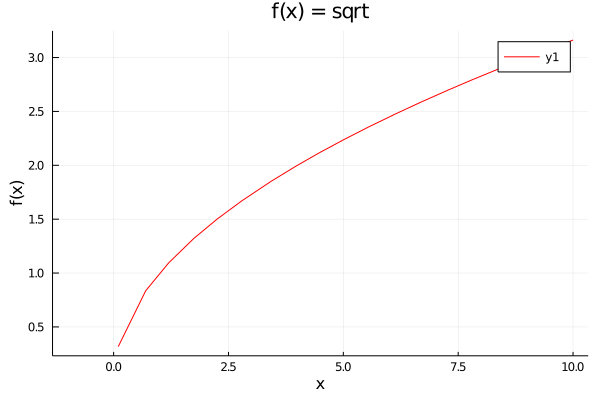

In [50]:
x1, x2 = -1, 10.0
plot(sqrt, x1, x2, c=:red)
xlabel!("x")
ylabel!("f(x)")
title!("f(x) = sqrt")

In [51]:
import Pkg; Pkg.add("Calculus")
using Calculus

   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [52]:
f(x) = sqrt(x)

f (generic function with 1 method)

In [53]:
n = 2
a = 1
x = 1.01

derivada_calculada = derivative(f)
derivada_no_ponto = derivada_calculada(a)

soma = sqrt(a) + derivada_no_ponto*(x-a)

proxima_derivada = derivative(derivada_calculada)

while n < 10
    
    derivada_no_ponto = proxima_derivada(a)
    
    termo = derivada_no_ponto * ((x-a)^n)/factorial(n)
    soma += termo
    
    println(soma)
    
    n += 1
    proxima_derivada = derivative(proxima_derivada)
end

println("\n\n")
println("Soma: ", soma)
println("Quantidade de termos: ", n-1)

1.0049875000000261
1.0049875678391238
1.0049832672234806
1.0060395151779864
1.3480964794844623
30.60274664244521
-16626.994971508797
788273.7449749103



Soma: 788273.7449749103
Quantidade de termos: 9


In [54]:
sqrt(1.01)

1.004987562112089

**Resposta:** 
Perceba que escolhendo o ponto $a=1$ na primeira iteração já conseguimos ter 6 cadas decimais corretas na função $\sqrt x$. Um ponto importante é que não podemos escolher $a=0$ pois teríamos uma divisão por zero e cairíamos nos números complexos. Portanto já na primeira iteração temos uma boa aproximação.



### 5. Seja $f(x) = ln(x + 1)$. Aproxime $f(1.5)$ usando o polinômio de Taylor de terceira ordem. Quantos dı́gitos corretos possui a aproximação? Quantos termos deve ter o polinômio para o erro de truncamento ser menor que $10^-8$

In [55]:
ln_x_mais_1(x) = log(ℯ, x + 1)
x1, x2 = -10.0, 10.0

(-10.0, 10.0)

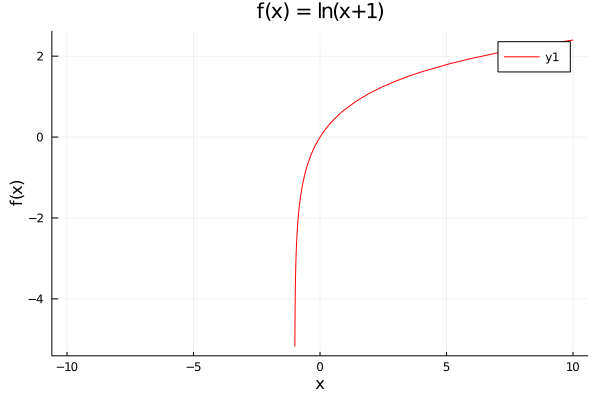

In [56]:
plot(ln_x_mais_1, x1, x2, c=:red)
xlabel!("x")
ylabel!("f(x)")
title!("f(x) = ln(x+1)")

Sendo $f(x)$ a nossa função $ln(x + 1)$, iremos calcular suas derivadas de primeira, segunda e terceira ordem:


Primeira ordem:
$$
    f'(x) = \frac{1}{x + 1}
$$

Segunda ordem:
$$
    f''(x) = -\frac{1}{(x+1)^2}
$$

Terceira ordem:
$$
    f'''(x) = \frac{2}{(x+1)^3}
$$

Por Taylor, o polinômio de terceira ordem é dado por

$$
    P_3(x) = f(a) + f'(a)(x-a) + \frac{f''(a)(x-a)^2}{2} + \frac{f'''(a)(x-a)^3}{3!}
$$


Observando as derivadas e substituindo pela função, temos que

$$
    P_3(x) = ln(a + 1) +  \frac{x-a}{a+1} - \frac{(x-a)^2}{2*(a+1)} + \frac{2*(x-a)^3}{3!*(a+1)}
$$

Vamos criar uma função que calcula a aproximação em Julia

In [57]:
ln(x) = log(ℯ, x)

ln (generic function with 1 method)

Observando a série vamos fazer uma aproximação genérica do polinômio de Taylor considerando o ponto em torno da origem.

Repare que se continuarmos nas derivadas vamos ver um padrão acontecer, os termos sempre vão pegar o fatorial do termo anterior na expressão, com isso podemos realizar a seguinte simplificação

$$
    P_n(x) = x - \frac{x^2}{2} + \frac{2*x^3}{3!} - \frac{6*x^4}{4!} + ... + \frac{N_{n-1}!*x^n}{n!} 
$$

Podemos tornar ainda mais genérico fazendo como a soma de 1 até a quantidade de quisermos

$$
    P_n(x) = (-1)^{n+1} * \frac{x^n}{n}
$$

In [58]:
# Calculando ao redor do ponto a = 0 com 3 termos
n = 3

pn(x) = (-1)^(n+1) * (x^n)/n

pn (generic function with 1 method)

In [59]:
pn(1.5)

1.125

Repare que esse resultado está estranho, vamos recalcular considerando o ponto 1 pois está mais próximo de 1.5

In [60]:
# Calculando ao redor do ponto a = 1
a = 1

# Função calculada por aproximação de Taylor no ponto a 
ex3_taylor_ln_p3_generica(x) = ln(a+1) + (x-a)/(a+1) - ((x-a)^2) / (2*(a+1)^2) + (2*(x-a)^3)/(factorial(3)*(a+1)^3)

ex3_taylor_ln_p3_generica (generic function with 1 method)

In [61]:
ex3_taylor_ln_p3_generica(1.5)

0.9171055138932787

In [62]:
# Função criada de ln
ln_x_mais_1(1.5)

0.9162907318741551

In [63]:
@assert abs(ln_x_mais_1(1.5) - ex3_taylor_ln_p3_generica(0)) < 1e-8

LoadError: AssertionError: abs(ln_x_mais_1(1.5) - ex3_taylor_ln_p3_generica(0)) < 1.0e-8

Repare que conseguimos uma aproximação melhor, mas só conseguimos dois dígitos corretos. Vamos calcular os termos para melhorar a aproximação

Observando a série vamos fazer uma aproximação genérica do polinômio de Taylor


$$
    P_n(x) = ln(a + 1) + \frac{x-a}{a+1} - \frac{(x-a)^2}{2*(a+1)^2} + \frac{2*(x-a)^3}{3!*(a+1)^3} - \frac{3!(x-a)^4}{4!*(a+1)^4} + ... +     \frac{N_{n - 1}!*(x-a)^N}{N!*(a+1)^N}
$$

Sabemos que $N! = N * N_{n-1}!$, então

$$
    P_n(x) = ln(a + 1) + \frac{x-a}{a+1} - \frac{(x-a)^2}{2*(a+1)^2} + \frac{(x-a)^3}{3*(a+1)^3} - \frac{(x-a)^4}{4*(a+1)^4} + ... +     \frac{(x-a)^N}{N*(a+1)^N}
$$


In [101]:
n = 2
a = 1
soma = ln(a + 1) + (x-a)/(a+1)
sinal = -1
x= 1.5

erro_relativo = abs(soma - ln_x_mais_1(1.5))

while erro_relativo > 1e-8
    termo = sinal * (x-a)^n/(n*(a+1)^n)
    
    soma += termo
    sinal *= -1
    n += 1
    
    erro_relativo = abs(soma - ln_x_mais_1(1.5))
    
end

println("\n\n")
println("Soma: ", soma)
println("Quantidade de termos: ", n-1)




Soma: 0.9162907359107514
Quantidade de termos: 11


In [102]:
ln_x_mais_1(1.5)

0.9162907318741551

In [103]:
@assert abs(soma - ln_x_mais_1(1.5)) < 1e-8

**Resposta:**

Dois dígitos foram corretos com o polinômio de terceira ordem e a ordem deve ser de 11 para o erro ser menor que $10^{-8}$

## 4. Lista de Exercı́cios - Zeros de Funções Reais

In [67]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

In [115]:
# Função que iremos utilizar nos exercícios

function calculo_bisseccao(f, a, b; precisao = 1e-8, iteracao_maxima=nothing)
    fa = f(a)
    fb = f(b)
    

    if abs(fa) <= precisao
        return a, fa
    elseif abs(fb) <= precisao
        return b, fb
    elseif fa * fb >= 0
        return "Os sinais da função no ponto especificado devem ser opostos"
    end

    
    x = (a + b) / 2
    fx = f(x)
    
    qtd_iteracoes = 0
    
    
    while (abs(fx) > precisao)
        
        if qtd_iteracoes == iteracao_maxima
            break
        end
        
        if fa * fx < 0
            b = x
            fb = fx
        else
            a = x
            fa = fx
        end
        
        x = (a + b) / 2
        fx = f(x)
        

        qtd_iteracoes += 1
    end
    
    
    return x, fx, qtd_iteracoes
    
    
end

calculo_bisseccao (generic function with 1 method)

### 1- Utilize o método da bissecção para encontrar uma solução com precisão de $10^{-5}$ para os seguintes problemas:

#### (a) $3x − 2 x = 0$ para $0 ≤ x ≤ 1$.



In [108]:
f1a(x) = 3*x - 2^x
x1, x2 = 0.0, 1.0

calculo_bisseccao(f1a, x1, x2, precisao=1e-5)

(0.45782470703125, 4.779584270142578e-6, 13)

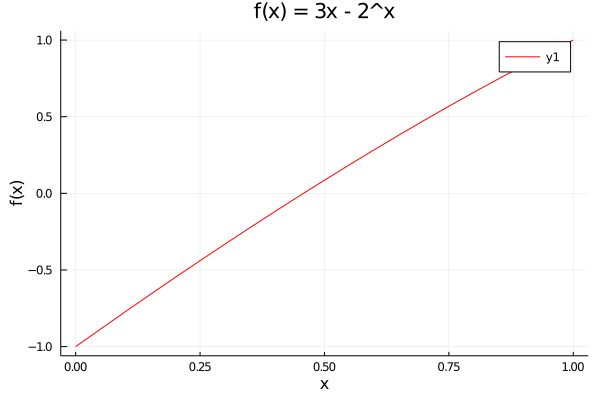

In [109]:
plot(f1a, x1, x2, c=:red)
xlabel!("x")
ylabel!("f(x)")
title!("f(x) = 3x - 2^x")

**Resposta questão 1.a):**

Solução = $0.45782470703125$

(b) $x*cos(x) − 2x^2 + 3x − 1 = 0$ para $0, 2 ≤ x ≤ 0, 3$ e $1, 2 ≤ x ≤ 1, 3$.

In [116]:
f1b(x) = x*cos(x) - 2x^2 + 3x - 1 
x1, x2 = 0.2, 0.3

calculo_bisseccao(f1b, x1, x2, precisao=1e-5)

(0.29752807617187504, -5.779346069045843e-6, 13)

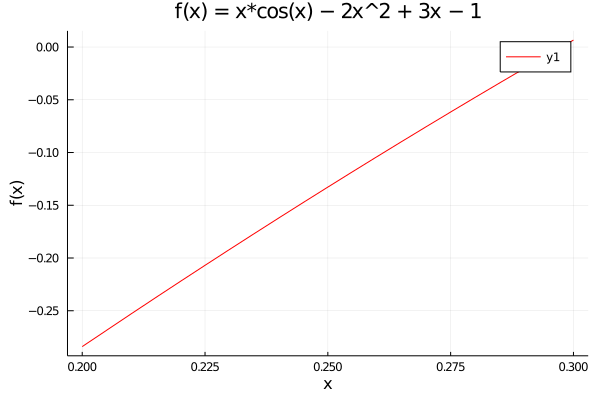

In [72]:
plot(f1b, x1, x2, c=:red)
xlabel!("x")
ylabel!("f(x)")
title!("f(x) = x*cos(x) − 2x^2 + 3x − 1")

**Resposta questão 1.b) para 0.2 ≤ x ≤ 0.3:**

Solução = $0.29752807617187504$

In [75]:
f1b(x) = x*cos(x) - 2x^2 + 3x - 1 
x1, x2 = 1.2, 1.3

calculo_bisseccao(f1b, x1, x2, precisao=1e-5)

(1.256622314453125, 2.936027865718671e-6, 13)

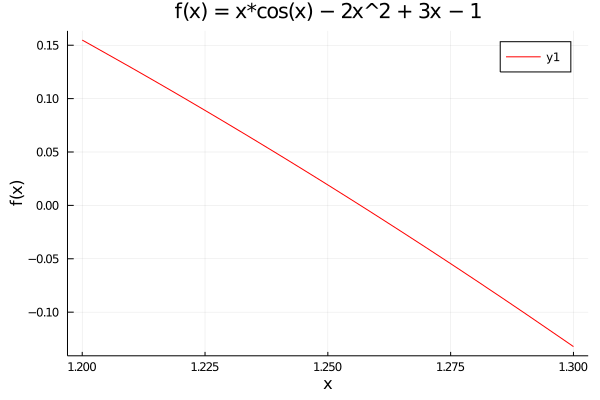

In [76]:
plot(f1b, x1, x2, c=:red)
xlabel!("x")
ylabel!("f(x)")
title!("f(x) = x*cos(x) − 2x^2 + 3x − 1")

**Resposta questão 1.b) para 1.2 ≤ x ≤ 1.3:**

Solução = $1.256622314453125$

<!-- ### 2. Encontre o número máximo de iterações necessário para obter, com uma precisão de $10^−3$ , a solução de $x^3 + x − 4 = 0$ que se encontra no intervalo $[1 : 2]$ usando o método da bissecção. -->

In [74]:
1 == nothing

false

### 2. Encontre o número máximo de iterações necessário para obter, com uma precisão de $10^{-3}$, a solução de $x^3 + x - 4 = 0$ que se encontra no intervalo [1; 2] usando o método da bissecção. Encontre um valor aproximado para a raiz com esse grau de precisão usando o método da posição falsa.

In [112]:
f2(x) = x^3 + x - 4
x1, x2 = 1, 2

calculo_bisseccao(f2, x1, x2, precisao=1e-3)

(1.37890625, 0.0007343888282775879, 7)

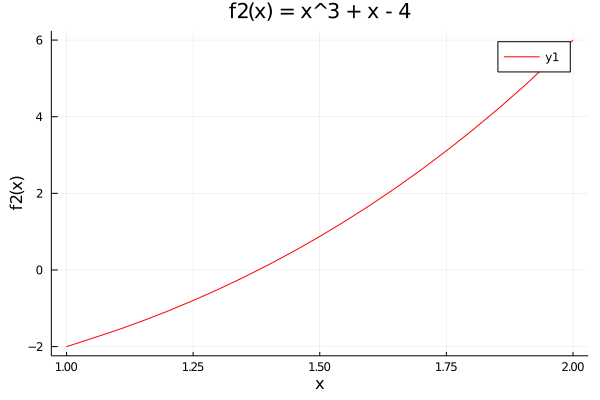

In [113]:
plot(f2, x1, x2, c=:red)
xlabel!("x")
ylabel!("f2(x)")
title!("f2(x) = x^3 + x - 4")

**Resposta questão 2:**

Valor $1.37890625$ para 7 iterações

### 6. Considere a função $f (x) = \frac{x^2}{2} + x (ln(x) - 1)$. Obtenha seus pontos crı́ticos com o auxı́lio de um método para zeros de funções.

Primeiro vamos entender a função que estamos trabalhando

In [80]:
ℯ

ℯ = 2.7182818284590...

In [81]:
base = ℯ
println("Base: ", base)

ln(x) = log(base, x)

Base: ℯ


ln (generic function with 1 method)

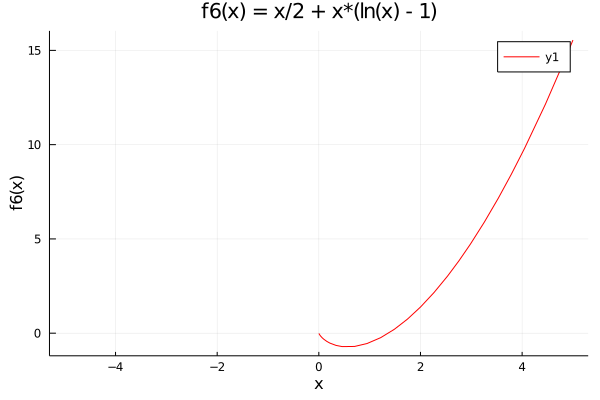

In [83]:
f6(x) = x^2/2 + x*(ln(x) - 1)
x1, x2 = -5, 5

plot(f6, x1, x2, c=:red)
xlabel!("x")
ylabel!("f6(x)")
title!("f6(x) = x/2 + x*(ln(x) - 1)")

Para calcular o ponto crítico, precisamos identificar todos os picos e vales da função. Olhando para o gráfico, vemos que ele cresce exponencialmente. Assim, só iremos encontrar um vale como pico da função (derivada nula).

Identificar esses pontos é o mesmo que encontrar os zeros de função de sua derivada. 

Calculando a derivada de $f(x) = \frac{x^2}{2} + x (ln(x) − 1)$ e utilizando a regra da cadeia temos o seguinte:

$$
    f'(x) = x + 1*(ln(x) - 1) + x*(\frac{1}{x}) => x + ln(x) -1 + 1 => x + ln(x)
$$

Agora vamos calcular o zero de função para a função $f'(x)$

In [85]:
ln(x) = log(ℯ, x)

ln (generic function with 1 method)

In [118]:
f6_derivate(x) = x + ln(x)

f6_derivate (generic function with 1 method)

In [119]:
f6(x) = x + ln(x)
x1, x2 = -1, 10

calculo_bisseccao(f6_derivate, x1, x2)

LoadError: DomainError with -1.0:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).

Repare que tivemos um erro, isso por que quando definimos log de um número negativo caimos nos números complexos.

Levando em consideração pela fórmula de Euler que $\pi*i = ln(-1)$, podemos chutar um valor negativo como o -2 e lidar com o seguinte para calcular na derivada da função $f'(x) = x + ln(x)$

$$
    f'(-2) = -2 + ln(-2) = -2 + ln(-1 * 2) => -2 + ln(-1) + ln(2)
$$

Como $ln(-1) = \pi*i$, então

$$
    f'(-2) = -2 + \pi*i + ln(2)
$$

In [120]:
function ln_complexa(x)
    if x >= 0
        return log(ℯ, x)
    else
        parte_positiva = x * (-1)
        parte_compelxa = π * 1im #im corresponde ao número complexo i
        
        return log(ℯ, parte_positiva) + parte_compelxa
    end
    
end

ln_complexa (generic function with 1 method)

In [122]:
# Exemplo de teste
ln_complexa(-2.0)

0.6931471805599453 + 3.141592653589793im

In [123]:
f6_derivate_complexa(x) = x + ln_complexa(x)

f6_derivate_complexa (generic function with 1 method)

In [124]:
# Exemplo de teste
f6_derivate_complexa(-1)

-1.0 + 3.141592653589793im

In [125]:
x1, x2 = -1, 10.0

calculo_bisseccao(f6_derivate_complexa, x1, x2)

LoadError: MethodError: no method matching isless(::Int64, ::Complex{Float64})
Closest candidates are:
  isless(!Matched::Missing, ::Any) at missing.jl:87
  isless(::Real, !Matched::AbstractFloat) at operators.jl:166
  isless(::Real, !Matched::Real) at operators.jl:355
  ...

Aqui temos um problema, pois mesmo resolvendo a situação dos números complexos, não conseguimos realizar comparações de números complexos com operadores lógicos. Vamos realizar um novo chute, mas dessa vez colocando $a= 0$

In [92]:
a = 0
f6_derivate_complexa(a)

-Inf

Quando calculamos a derivada de f6 no ponto a, vemos que ela converge para o -Inf. Isso também é um problema, então vamos plotar o gráfico da nossa função para melhorar o chute

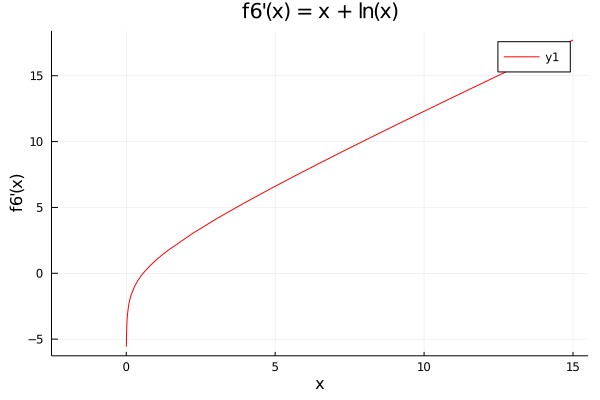

In [93]:
f6(x) = x + ln(x)
x1, x2 = -2, 15

plot(f6, x1, x2, c=:red)
xlabel!("x")
ylabel!("f6'(x)")
title!("f6'(x) = x + ln(x)")

Olhando para o gráfico, observamos que um bom chute é andar um pequeno passo para a direita do zero, vamos então tentar com $0.1$

In [94]:
x1, x2 = 0.1, 10.0

calculo_bisseccao(f6_derivate_complexa, x1, x2)

(0.5671432928182185, 6.65504162888908e-9, 29)

**Resposta questão 6:**

Valor $0.5671432928182185$

### Questão 7 a) A função $f(x) = tan(\pi*x) - 6$ tem um zero em $\frac{1}{\pi} arctan(6) ≈ 0,447431543$. Use 10 iterações para cada um dos seguintes métodos para calcular o valor aproximado dessa raiz: Método da bissecção, com a = 0 e b = 0, 48

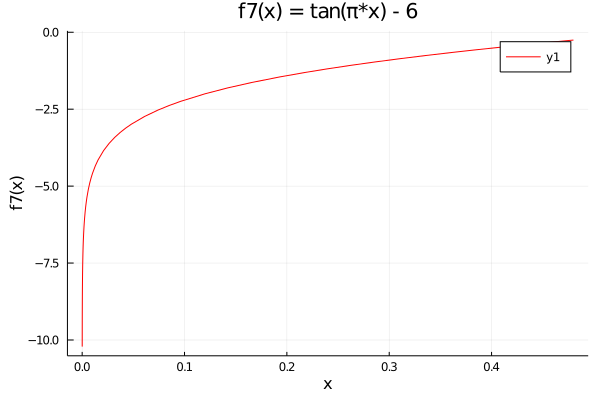

In [95]:
f7(x) = tan(π*x) - 6
x1, x2 = 0, 0.48

plot(f6, x1, x2, c=:red)
xlabel!("x")
ylabel!("f7(x)")
title!("f7(x) = tan(π*x) - 6")

In [96]:
f7(x) = tan(π*x) - 6

x1, x2 = 0, 0.48

calculo_bisseccao(f7, x1, x2, iteracao_maxima=10)

(0.44742187499999997, -0.0011236267485612572, 10)

In [97]:
@assert 0.44742187499999997 ≈ 1/π * atan(6)

LoadError: AssertionError: 0.44742187499999997 ≈ (1 / π) * atan(6)

In [98]:
f7(x) = tan(π*x) - 6

x1, x2 = 0, 0.48

calculo_bisseccao(f7, x1, x2)

(0.4474315432459115, -4.979107792735249e-9, 30)

In [99]:
@assert 0.4474315432459115 ≈ 1/π * atan(6)

Repare que com 10 iterações já temos uma boa aproximação inicial mas não é tanto precisa, tanto que não conseguimos nos aproximar tanto da função original. Quando aumentamos a iteração conseguimos aproximar melhor do valor original e não tivemos erro na validação com a aproximação da função original

**Resposta questão 7:**

Valor $0.44742187499999997$ para 10 iterações